# Team 68 Data Exploration

## Adwoa's method

In [ ]:
# Load packages
import os
import pandas as pd
import numpy as np

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Advanced plotting functionality with seaborn
import seaborn as sns

with open('data/public_up_to_150k_1.csv') as f:
    public_150k_1=pd.read_csv(f, delimiter=';')
    
chunksize = 10 ** 8
for chunk in pd.read_csv('data/public_up_to_150k_1.csv', chunksize=chunksize):
    process(chunk)

In [ ]:
%%time
#Reading public_up_to_150k_1 csv file
row_count = 1000
for chunk in pd.read_csv('public_up_to_150k_1.csv', chunksize=row_count): 
    df_1 = chunk # process it

In [ ]:
df_1.shape

In [ ]:
df = pd.read_csv('public_up_to_150k_1.csv')

There are 11 csv files to iterate through, plus the first with an irregular name.

In [ ]:
%%time
#Reading public_150k_plus csv file
row_count = 1000
for chunk in pd.read_csv('data/public_150k_plus.csv', chunksize=row_count): 
    df_12 = chunk # process it

In [ ]:
df_12.head(5)

In [ ]:
#Adding all the dataframes into list
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

In [ ]:
#Using concat to merge all dataframe into one
df = pd.concat(frames)

## Or Darnell's method

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np 
import sqlite3
from sqlalchemy import create_engine

In [ ]:
print(pd.read_csv('ppploans.csv', nrows=2))

In [ ]:
csv_database = create_engine('sqlite:///csv_database.db')

In [ ]:
csz = 1000000
i = 0 
j = 0 

Not sure why it keeps looping here, it returns more index values than it should.

In [ ]:
for df in pd.read_csv('ppploans.csv', chunksize = csz, iterator=True): 
    df = df.rename(columns = {c: c.replace('', '') for c in df.columns})
    df.index += j 
    
    df.to_sql('data_use', csv_database, if_exists = 'append')
    j = df.index[-1]+1
    
    print('| index: {}'.format(j))

In [ ]:
df = pd.read_sql_query ('SELECT * FROM data_use', csv_database) 

## Richard's Method

### Chunk size for loop iteration into a single df from a merged csv

In [1]:
# Load packages
import os
import pandas as pd
import numpy as np

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Advanced plotting functionality with seaborn
import seaborn as sns

### Reading the aggregated file in chunks

In [ ]:
df_list = []
row_count = 1000000
df = pd.read_csv('ppploans.csv', chunksize=row_count)
for x in df:
    #df_filter = chunk_preprocessing(x)
    df_list.append(x)
df_concat = pd.concat(df_list)

In [ ]:
df_concat.shape

### Reading each of the files as they are saved from the PPP website

In [3]:
%%time
df1 = pd.read_csv('public_150k_plus.csv')

CPU times: user 5.47 s, sys: 354 ms, total: 5.82 s
Wall time: 5.83 s


In [4]:
%%time
vol = ['_1','_2','_3','_4','_5','_6','_7','_8','_9','_10','_11']

vol_list = []
for x in vol:
    a= pd.read_csv(f'public_up_to_150k{x}.csv', low_memory= 0)
    vol_list.append(a)

df2 = pd.concat(vol_list , ignore_index = 1)

CPU times: user 1min 23s, sys: 9.77 s, total: 1min 33s
Wall time: 1min 33s


In [5]:
%%time
df_concat1 = pd.concat([df1,df2])
df_concat1.shape

CPU times: user 9.31 s, sys: 8.59 s, total: 17.9 s
Wall time: 23.5 s


(10697219, 51)

In [11]:
df_concat1.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,9547507704,05/01/2020,464.0,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,NaN,NaN,Corporation,19248.0,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
1,9777677704,05/01/2020,464.0,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,NaN,...,NaN,NaN,Sole Proprietorship,19248.0,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN
2,5791407702,05/01/2020,1013.0,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,NaN,NaN,Non-Profit Organization,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y
3,6223567700,05/01/2020,920.0,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,NaN,...,NaN,NaN,Corporation,9551.0,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN
4,9662437702,05/01/2020,101.0,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57328.0,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN


This will tell you a few key columns and what some of the unique values are.

In [7]:
df_c = df_concat1
b = list(df_c)
l = [3,6,7,8,10,11,12,13,14,16,18,23,33,34,35,36,37,38,39,40,41,42,43,48,49,50]

In [8]:
for x in l:
    print(b[x])
    print(df_c[b[x]].unique())

ProcessingMethod
['PPP' 'PPS']
BorrowerCity
['Sumter' 'North Charleston' 'SEATTLE' ... 'WAPITI' 'Granite Canon'
 'Cody,']
BorrowerState
[nan 'AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI'
 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY'
 'AE' 'FI']
BorrowerZip
['29150-9662' '29420-9000' '98112-2922' ... '82604-4306' '82240-8837'
 '82701-3140']
LoanStatus
['Paid in Full' 'Exemption 4' 'Active Un-Disbursed']
Term
[24 60 23 59 36 27 34 58 21 25 37 49 50 33 19 30 47 52 44 26 32 22 54 12
  7 15 14 13  0 48 61 29 65 17 18 35 43 55 53 51 57 38 16 28 31 63]
SBAGuarantyPercentage
[100]
InitialApprovalAmount
[7.6935878e+05 7.3692779e+05 6.9135500e+05 ... 3.4520000e+02 2.5645000e+02
 2.3602000e+02]
CurrentApprovalAmount
[7.6935878e+05 7.3692779e+05 6.9135500e+05 ... 3.4520000e+02 2.5645000e+02
 2.3602000e+02]
Fra

In [ ]:
cols = ['LoanStatus',
 'Term',
 'SBAGuarantyPercentage',
 'InitialApprovalAmount',
 'CurrentApprovalAmount',
 'UndisbursedAmount','ServicingLenderName',
       'RuralUrbanIndicator','Race',
 'Ethnicity','BusinessType','Gender',
 'Veteran',
 'NonProfit']

In [45]:
%%time
for x in l:
    print(b[x])
    print(df_c[b[x]].value_counts())

ProcessingMethod
PPP    8136772
PPS    2560447
Name: ProcessingMethod, dtype: int64
BorrowerCity
Chicago          139182
Houston           97120
New York          76007
Los Angeles       74858
Miami             74623
                  ...  
FRESNOO               1
Andrian               1
75089                 1
Pleasnat Hill         1
Georgia 30248         1
Name: BorrowerCity, Length: 75295, dtype: int64
BorrowerState
CA    1180893
FL     900252
TX     863797
NY     690739
IL     583882
GA     479178
OH     324977
PA     320884
NJ     286578
MI     273015
NC     239314
MO     221745
MN     217096
TN     212665
MA     209201
VA     208487
LA     192693
WA     187599
CO     185763
WI     180859
MD     176434
IN     175187
IA     167374
AZ     156915
AL     153164
OK     148932
SC     134655
KS     123437
KY     123010
MS     119932
CT     114008
OR     112305
NE     110966
NV     106007
AR      93959
UT      82047
PR      64947
SD      62739
ID      50915
ND      50290
ME      46406
MT 

In [50]:
for x in l:
    print(b[x])

ProcessingMethod
BorrowerCity
BorrowerState
BorrowerZip
LoanStatus
Term
SBAGuarantyPercentage
InitialApprovalAmount
CurrentApprovalAmount
FranchiseName
ServicingLenderName
RuralUrbanIndicator
NAICSCode
Race
Ethnicity
UTILITIES_PROCEED
PAYROLL_PROCEED
MORTGAGE_INTEREST_PROCEED
RENT_PROCEED
REFINANCE_EIDL_PROCEED
HEALTH_CARE_PROCEED
DEBT_INTEREST_PROCEED
BusinessType
Gender
Veteran
NonProfit


In [ ]:
l1 = [3,6,7,10,11,12,16,18,23,33,34,35,36,37,38,39,40,41,42,43,48,49,50]
#for x in l1:
#    print(b[x])

In [ ]:
%%time
for x in l:
    plt.title(b[x])
    df_c[b[x]].value_counts().plot.bar()

<AxesSubplot:title={'center':'Gender'}>

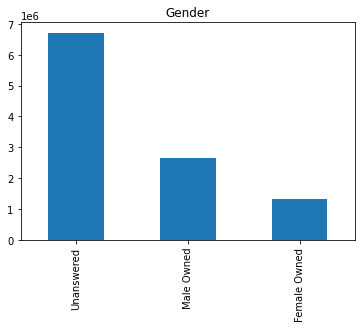

In [11]:
plt.title(b[48])
df_c[b[48]].value_counts().plot.bar()